<a href="https://colab.research.google.com/github/joshuagrossman/asian-admission-di/blob/main/replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Replication code for *The Disparate Impacts of College Admissions Policies on Asian American Applicants (2023)*
Joshua Grossman, Sabina Tomkins, Lindsay Page, and Sharad Goel

In [1]:
# Round to three decimal places
options(digits=3, signif=3, scipen=999, tidyverse.quiet=TRUE)

# Required packages
library(tidyverse)
library(broom)
library(glue)

# stargazer not installed by default in Google Colab
install.packages('stargazer')
library(stargazer)

# Black and white theme for plots
theme_set(theme_bw())

# colorblind-safe color palette
cbPalette = c(
  "#999999",
  "#E69F00",
  "#56B4E9",
  "#009E73",
  "#F0E442",
  "#0072B2",
  "#D55E00",
  "#CC79A7"
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [2]:
# Import data from Github
# Note that groups with fewer than 50 applicants or with no admits are excluded
repo = "https://raw.githubusercontent.com/joshuagrossman/asian-admission-di/main/data"
ethnicity_act_legacy = read_csv(glue('{repo}/ethnicity_act_legacy.csv'), show_col_types = FALSE)
race_act_legacy = read_csv(glue('{repo}/race_act_legacy.csv'), show_col_types = FALSE)
race_zip1_act_legacy = read_csv(glue('{repo}/race_zip1_act_legacy.csv'), show_col_types = FALSE)
ethnicity_zip1_act_legacy = read_csv(glue('{repo}/ethnicity_zip1_act_legacy.csv'), show_col_types = FALSE)

## Admission rates by ethnicity and standardized test score

Asian American applicants typically were admitted at lower rates than white applicants with identical test scores, with the largest gap for South Asian students.

In [3]:
slice_sample(ethnicity_act_legacy, n=5)

ethnicity,act,legacy,n_applicants,n_admits
<chr>,<dbl>,<lgl>,<dbl>,<dbl>
Southeast Asian,35,FALSE,1904,345
East Asian,33,TRUE,268,69
South Asian,34,FALSE,6211,512
East Asian,34,FALSE,9337,1070
White,34,TRUE,3387,1225


`summarise()` has grouped output by 'ethnicity'. You can override using the
`.groups` argument.
Warning message:
“The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


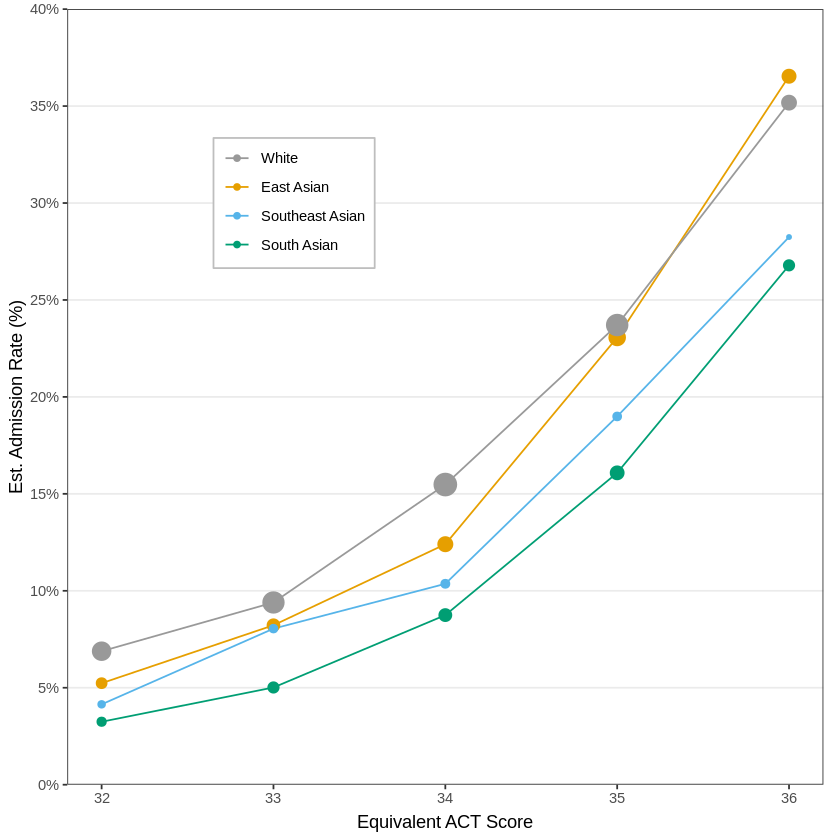

In [4]:
# Calculate admit rate by subgroup and ACT score.
ethnicity_act_legacy_plot_df = ethnicity_act_legacy %>%
  group_by(ethnicity, act) %>%
  summarize(
    n_applicants = sum(n_applicants, na.rm=TRUE),
    n_admits = sum(n_admits, na.rm=TRUE)
  ) %>%
  ungroup() %>%
  mutate(
    admit_rate = n_admits / n_applicants,
  )

# Generate plot of admission rate by subgroup and ACT score.
ethnicity_act_legacy_plot_df %>%
  ggplot(aes(x = act,
             y = admit_rate,
             color = ethnicity)) +
  geom_line(aes(group = ethnicity)) +
  geom_point(aes(size = n_applicants)) +
  scale_x_continuous(
    name = 'Equivalent ACT Score',
    breaks = 32:36,
  ) +
  scale_y_continuous(
    name = 'Est. Admission Rate (%)',
    labels = scales::percent_format(1),
    breaks = seq(0, 0.40, 0.05),
    limits = c(0, 0.40),
    expand = c(0,0),
  ) +
  scale_size_continuous(
    guide='none'
  ) +
  scale_color_manual(
    name = NULL,
    breaks = c('White', 'East Asian', 'Southeast Asian', 'South Asian'),
    labels = c('White', 'East Asian', 'Southeast Asian', 'South Asian'),
    values=cbPalette
  ) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    legend.position = c(0.3, 0.75),
    legend.background = element_blank(),
    legend.box.background = element_rect(colour = "gray", size=0.5),
    legend.text = element_text(margin = margin(0, 0, 0, 0)),
    legend.spacing.y = unit(-2, "pt"),
    plot.margin = unit(c(t=5.5, r=10, b=5.5, l=5.5), "points"),
    axis.title.x = element_text(margin = margin(t = 5, r = 0, b = 0, l = 0))
  )

## Admission rates by race, standardized test score, and legacy status

Across test scores, we find that applicants with a parent who attended one of the selective institutions we consider as an undergraduate are more than twice as likely to be admitted than non-legacy applicants with the same test scores.

In [5]:
slice_sample(race_act_legacy, n=5)

race,act,legacy,n_applicants,n_admits
<chr>,<dbl>,<lgl>,<dbl>,<dbl>
Asian,36,TRUE,409,242
Asian,34,TRUE,665,203
White,34,TRUE,3387,1225
White,33,TRUE,2459,591
White,33,FALSE,22291,1735


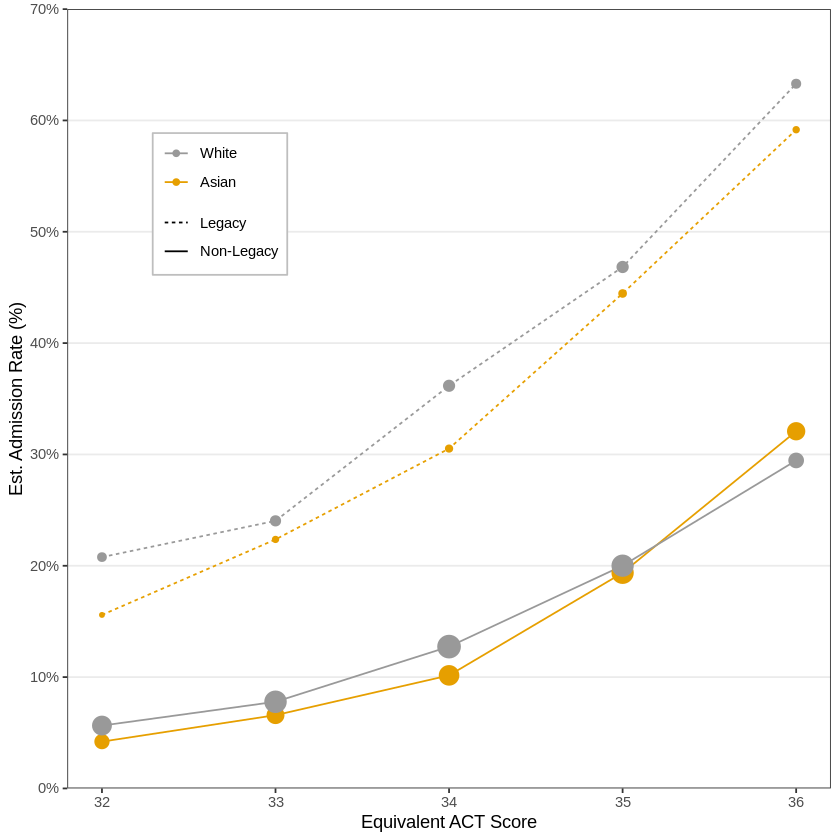

In [6]:
# Calculate admit rate by race and legacy status.
race_act_legacy_plot_df = race_act_legacy %>%
  mutate(
    admit_rate = n_admits / n_applicants
  )

# Plot admit rate by race and legacy status.
race_act_legacy_plot_df %>%
  ggplot(aes(x=act,
             y=admit_rate,
             color=race)) +
  geom_line(aes(linetype=legacy)) +
  geom_point(aes(size=n_applicants)) +
  scale_linetype_discrete(
    name=NULL,
    breaks=c(TRUE, FALSE),
    labels=c('Legacy', 'Non-Legacy')
  ) +
  scale_x_continuous(
    name = 'Equivalent ACT Score',
    breaks = 32:36
  ) +
  scale_y_continuous(
    name = 'Est. Admission Rate (%)',
    labels = scales::percent_format(1),
    breaks = seq(0, 0.7, 0.1),
    limits = c(0, 0.7),
    expand=c(0,0)
  ) +
  scale_size_continuous(
    guide='none'
  ) +
  scale_color_manual(
    name = NULL,
    breaks = c('White', 'Asian'),
    labels = c('White', 'Asian'),
    values=cbPalette
  ) +
  theme(
    panel.spacing = unit(1.5, "lines"),
    legend.position = c(0.2, 0.75),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    legend.background = element_blank(),
    legend.box.background = element_rect(colour = "gray", size=0.5),
    legend.text = element_text(margin = margin(0, 0, 0, 0)),
    legend.spacing.y = unit(-2, "pt")
  )

## Legacy prevalence by ethnicity

High-scoring white applicants are three to six times more likely to have legacy status than high-scoring
Asian American applicants, suggesting white applicants disproportionately benefit from a boost in admission rates afforded to those with legacy status.

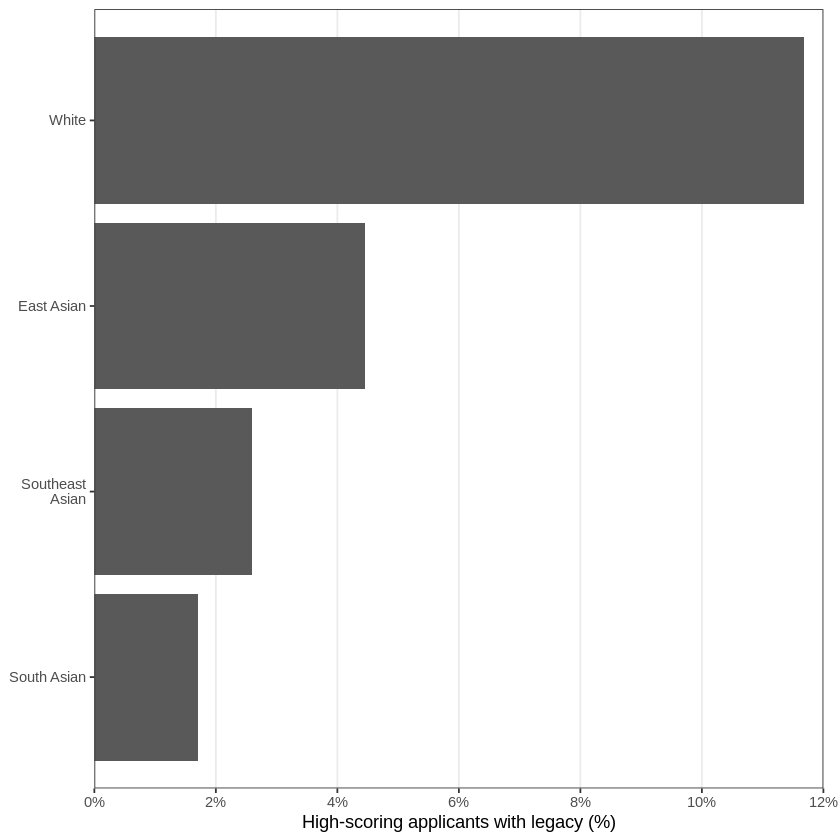

In [7]:
# Get legacy prevalence by group
legacy_by_region_plot_df = ethnicity_act_legacy %>%
  group_by(ethnicity) %>%
  summarize(
    n_legacy = sum(n_applicants * legacy, na.rm=TRUE),
    n_not_legacy = sum(n_applicants * (! legacy), na.rm=TRUE),
    n_tot = n_legacy + n_not_legacy,
    p_legacy = n_legacy / n_tot
  ) %>%
  ungroup() %>%
  arrange(p_legacy) %>%
  mutate(
    ethnicity = factor(ethnicity, levels=unique(.$ethnicity))
  )

# Plot legacy prevalence by subgroup
legacy_by_region_plot_df %>%
  ggplot() +
  geom_col(aes(y=ethnicity, x=p_legacy)) +
  scale_x_continuous(
    name='High-scoring applicants with legacy (%)',
    labels=scales::percent_format(1),
    limits = c(0,0.12),
    breaks = seq(0, 0.12, 0.02),
    expand = c(0,0)
  ) +
  scale_y_discrete(
    name=NULL,
    breaks = c('White', 'East Asian', 'Southeast Asian', 'South Asian'),
    labels = c('White', 'East Asian', 'Southeast\nAsian', 'South Asian'),
  ) +
  theme(
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.y = element_blank(),
    plot.margin = unit(c(t=5.5, r=10, b=5.5, l=5.5), "points"),
  )

## Admission rate and Asian American prevalence by first digit of ZIP code

First digit ZIP regions with a greater share of Asian American applicants have, on average, lower estimated admission rates for high-scoring applicants.

In [8]:
slice_sample(race_zip1_act_legacy, n=5)

race,zip1,act,legacy,n_applicants,n_admits
<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
White,0,34,TRUE,942,357
Asian,0,36,FALSE,2538,1027
Asian,2,36,TRUE,NA,NA
White,7,36,FALSE,494,105
White,8,34,TRUE,101,36


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


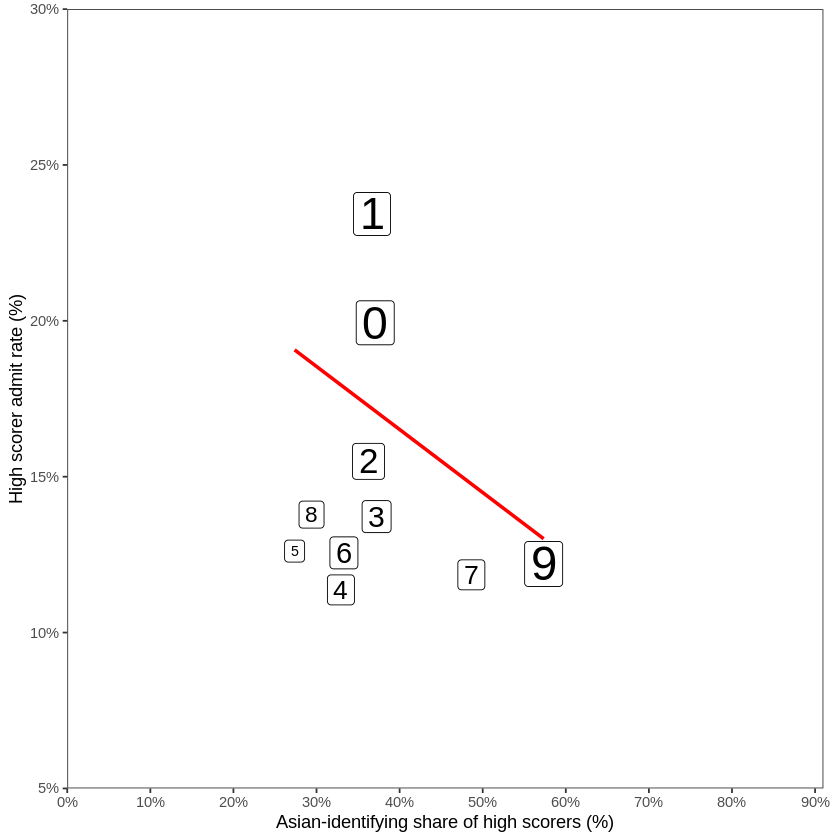

In [9]:
# Get admit rate and Asian American prevalence by ZIP1.
race_zip1_act_legacy_plot_df = race_zip1_act_legacy %>%
  group_by(zip1) %>%
  summarize(
    n_asian_applicants = sum(n_applicants * (race=='Asian'), na.rm=TRUE),
    n_applicants = sum(n_applicants, na.rm=TRUE),
    n_admits = sum(n_admits, na.rm=TRUE),
  ) %>%
  ungroup() %>%
  mutate(
    p_accept = n_admits / n_applicants,
    p_asian_applicants = n_asian_applicants / n_applicants
  )

# Plot admit rate and Asian American prevalence by ZIP1.
race_zip1_act_legacy_plot_df %>%
  ggplot(aes(x=p_asian_applicants, y=p_accept)) +
  geom_smooth(
    aes(weight = n_applicants),
    method="lm",
    color="red",
    se=FALSE,
    size=1
  ) +
  geom_label(
    aes(label=zip1, size=n_applicants)
  ) +
  scale_x_continuous(
    name="Asian-identifying share of high scorers (%)",
    labels=scales::percent_format(1),
    breaks=seq(0,0.9,0.1),
    limits = c(0, 0.91),
    expand=c(0,0)
  ) +
  scale_y_continuous(
    name=glue("High scorer admit rate (%)"),
    labels=scales::percent_format(1),
    breaks=seq(0.05,0.30,by=0.05),
    limits=c(0.05,0.30),
    expand=c(0,0)
  ) +
  scale_size_continuous(
    guide='none',
    range=c(3,10)
  ) +
  theme(
    panel.grid = element_blank(),
    plot.margin = unit(c(t=5.5, r=10, b=5.5, l=5.5), "points"),
  )

## Differences in Asian American and white admission odds conditional on qualification

After adjusting for test scores, Asian American students had lower estimated odds of admission than white students.
In particular, South Asian students had the lowest estimated odds of admission relative to white students, with East Asian and Southeast Asian applicants exhibiting smaller but statistically significant gaps. These disparities appear to be explained in part by legacy preferences and geography.

In [10]:
slice_sample(race_zip1_act_legacy, n=5)

race,zip1,act,legacy,n_applicants,n_admits
<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
Asian,3,35,FALSE,1347,227
Asian,0,35,TRUE,209,104
Asian,1,36,TRUE,90,63
White,8,34,TRUE,101,36
Asian,8,36,TRUE,NA,NA


In [11]:
asian_white_regression_df = race_zip1_act_legacy %>%
  mutate(
    zip_first = as.character(zip1),
    race = fct_relevel(race, 'White')
  )

# Fit main models without distinguishing across Asian subgroups.
asian_only_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ race,
  family=binomial(),
  data=asian_white_regression_df
)

asian_act_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ race + act,
  family=binomial(),
  data=asian_white_regression_df
)

asian_act_legacy_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~  race + act + legacy,
  family=binomial(),
  data=asian_white_regression_df
)

asian_act_zip_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~  race + act + zip_first,
  family=binomial(),
  data=asian_white_regression_df
)

asian_act_legacy_zip_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~  race + act + legacy + zip_first,
  family=binomial(),
  data=asian_white_regression_df
)

asian_model_list = list(
  asian_only_model,
  asian_act_model,
  asian_act_legacy_model,
  asian_act_zip_model,
  asian_act_legacy_zip_model
)

# Convert log odds ratios to odds ratios
# Standard error approximate transformation:
# https://stats.stackexchange.com/questions/158481/how-to-convert-the-standard-error-of-the-log-odds-ratio-to-the-odds-ratio-standa
raw_coef_list = map(asian_model_list, ~ tidy(.x)$estimate)
raw_se_list = map(asian_model_list, ~ tidy(.x)$std.error)
exp_coef_list = map(raw_coef_list, exp)
exp_se_list = map2(exp_coef_list, raw_se_list, ~ .x * .y)

stargazer(
  asian_model_list,
  type='text',
  coef = exp_coef_list,
  se = exp_se_list,
  dep.var.labels.include = FALSE,
  dep.var.caption = 'Dep. Variable: Inferred acceptance'
)


                           Dep. Variable: Inferred acceptance          
                  -----------------------------------------------------
                     (1)        (2)        (3)        (4)        (5)   
-----------------------------------------------------------------------
raceAsian          0.993***   0.778***   0.922***   0.824***  0.975*** 
                   (0.013)    (0.011)    (0.013)    (0.012)    (0.014) 
                                                                       
act                           1.750***   1.740***   1.790***  1.780*** 
                              (0.011)    (0.011)    (0.011)    (0.011) 
                                                                       
legacy                                   3.770***             3.540*** 
                                         (0.075)               (0.072) 
                                                                       
zip_first1                                          1.340***  1

In [12]:
slice_sample(ethnicity_zip1_act_legacy, n=5)

ethnicity,zip1,act,legacy,n_applicants,n_admits
<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
East Asian,2,34,FALSE,741,92
South Asian,7,36,TRUE,NA,NA
Southeast Asian,9,32,TRUE,NA,NA
Southeast Asian,5,34,FALSE,NA,NA
Southeast Asian,1,35,TRUE,NA,NA


In [13]:
subgroups_regression_df = ethnicity_zip1_act_legacy %>%
  mutate(
    zip_first = as.character(zip1),
    ethnicity = fct_relevel(ethnicity, 'White')
  )

# Fit main models with coefficients for each Asian subgroup.
subgroups_only_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ ethnicity,
  family=binomial(),
  data=subgroups_regression_df
)

subgroups_act_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ ethnicity + act,
  family=binomial(),
  data=subgroups_regression_df
)

subgroups_act_legacy_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ ethnicity + act + legacy,
  family=binomial(),
  data=subgroups_regression_df
)

subgroups_act_zip_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ ethnicity + act + zip_first,
  family=binomial(),
  data=subgroups_regression_df
)

subgroups_act_legacy_zip_model = glm(
  cbind(n_admits, n_applicants - n_admits) ~ ethnicity + act + legacy + zip_first,
  family=binomial(),
  data=subgroups_regression_df
)

subgroup_model_list = list(
  subgroups_only_model,
  subgroups_act_model,
  subgroups_act_legacy_model,
  subgroups_act_zip_model,
  subgroups_act_legacy_zip_model
)

# Convert log odds ratios to odds ratios
# Standard error approximate transformation:
# https://stats.stackexchange.com/questions/158481/how-to-convert-the-standard-error-of-the-log-odds-ratio-to-the-odds-ratio-standa
raw_coef_list = map(subgroup_model_list, ~ tidy(.x)$estimate)
raw_se_list = map(subgroup_model_list, ~ tidy(.x)$std.error)
exp_coef_list = map(raw_coef_list, exp)
exp_se_list = map2(exp_coef_list, raw_se_list, ~ .x * .y)

stargazer(
  subgroup_model_list,
  type='text',
  coef = exp_coef_list,
  se = exp_se_list,
  dep.var.labels.include = FALSE,
  dep.var.caption = 'Dep. Variable: Inferred acceptance'
)


                                   Dep. Variable: Inferred acceptance          
                         ------------------------------------------------------
                            (1)        (2)        (3)        (4)        (5)    
-------------------------------------------------------------------------------
ethnicityEast Asian       1.210***   0.913***   1.070***   0.959***   1.130*** 
                          (0.018)    (0.015)    (0.017)    (0.016)    (0.019)  
                                                                               
ethnicitySouth Asian      0.726***   0.565***   0.704***   0.604***   0.747*** 
                          (0.015)    (0.012)    (0.016)    (0.013)    (0.017)  
                                                                               
ethnicitySoutheast Asian  0.686***   0.687***   0.854***   0.769***   0.956*** 
                          (0.025)    (0.026)    (0.032)    (0.029)    (0.037)  
                                       